In [8]:

!pwd
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

/home/jupyter/src/Thesis_Project
Fri Feb 10 20:11:08 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0    30W / 250W |      0MiB / 16384MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                       

The data are the result of each subject performing the following tasks in a laboratory (for each session):

Task 0: Transcription of Steve Jobs' Commencement Speech split in three pieces 

Task 1: Free Text Questions

- a.  2 survey style questions, 1 scene description
- b.  series of routine work in order to mimic the realistic daily working scenario, e.g., checking email, sending email and web surfing.

There is one folder for each session. Under the session folder, there are 2 folders named baseline subset and rotation subset. Under the subset folder there are 2 files for each subject, task 0 and task 1, named by the subject ID. The naming rules are shown as follows.



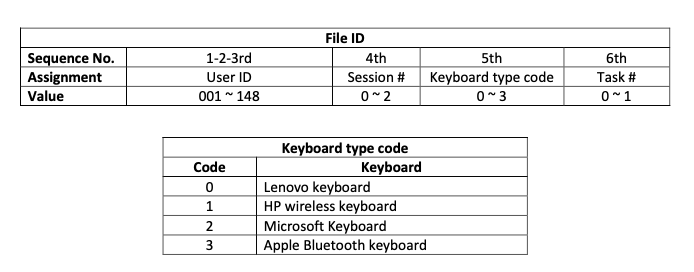

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


In [24]:
import glob

path = "/home/jupyter/src/Thesis_Project/s0/baseline"
all_files = glob.glob(path + "/*")
print("Total number of subjects:", len(all_files))

# li = []

for id,filename in enumerate(all_files):
    if id > 5:
        break
    df = pd.read_table(filename, header=None, error_bad_lines=False)
    print("Filename: %s, Keystorkes: %d"%(filename, len(df)))
  # li.append(df)


# df = pd.concat(li, axis=0, ignore_index=True)
# df

Total number of subjects: 150
Filename: /home/jupyter/src/Thesis_Project/s0/baseline/059000.txt, Keystorkes: 8198
Filename: /home/jupyter/src/Thesis_Project/s0/baseline/040000.txt, Keystorkes: 6823
Filename: /home/jupyter/src/Thesis_Project/s0/baseline/002000.txt, Keystorkes: 6687
Filename: /home/jupyter/src/Thesis_Project/s0/baseline/026000.txt, Keystorkes: 9264
Filename: /home/jupyter/src/Thesis_Project/s0/baseline/022001.txt, Keystorkes: 2888
Filename: /home/jupyter/src/Thesis_Project/s0/baseline/026001.txt, Keystorkes: 4279


In [23]:
df = pd.read_table("/home/jupyter/src/Thesis_Project/s0/baseline/001000.txt", header=None, error_bad_lines=False, sep=' ')
df2 = pd.read_table("/home/jupyter/src/Thesis_Project/s0/baseline/001001.txt", header=None, error_bad_lines=False, sep=' ')

print("Filename: %s, Keystorkes: %d"%('001000', len(df)))
print("Filename: %s, Keystorkes: %d"%('001001', len(df2)))

charactors = list(df[0].value_counts().keys())
print(len(charactors), sorted(charactors))

charactors2 = list(df2[0].value_counts().keys())
print(len(charactors2), sorted(charactors2))

df

Filename: 001000, Keystorkes: 7792
Filename: 001001, Keystorkes: 6108
48 ['A', 'B', 'Back', 'C', 'Capital', 'D', 'D0', 'D1', 'D3', 'D5', 'D6', 'D7', 'D8', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'LControlKey', 'LMenu', 'LShiftKey', 'M', 'N', 'O', 'Oem1', 'Oem7', 'OemMinus', 'OemPeriod', 'OemQuestion', 'Oemcomma', 'Oemplus', 'P', 'Q', 'R', 'RShiftKey', 'Return', 'S', 'Space', 'T', 'Tab', 'U', 'V', 'W', 'X', 'Y']
48 ['A', 'B', 'Back', 'C', 'D', 'D0', 'D1', 'D2', 'Delete', 'Down', 'E', 'Escape', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'LControlKey', 'LMenu', 'LShiftKey', 'Left', 'M', 'N', 'O', 'OemMinus', 'OemPeriod', 'OemQuestion', 'Oemcomma', 'Oemplus', 'P', 'Q', 'R', 'RControlKey', 'Return', 'Right', 'S', 'Space', 'T', 'Tab', 'U', 'Up', 'V', 'W', 'X', 'Y', 'Z']


,0,1,2
0,LMenu,KeyDown,63578429757751
1,Tab,KeyDown,63578429757861
2,LMenu,KeyUp,63578429757970
3,Tab,KeyUp,63578429757985
4,LMenu,KeyDown,63578429761511
...,...,...,...
7787,LControlKey,KeyUp,63578430789724
7788,LMenu,KeyDown,63578430790068
7789,Tab,KeyDown,63578430790177
7790,LMenu,KeyUp,63578430790255


In [3]:
df = df.to_numpy()

In [4]:
# all_charactors = list("ABCDEFGHIGKLMNOPQRSTUVWXYZ")
# all_charactors.extend(["D0", "D1", "D2", "D3", "D4", "D5", "D6", "D7", "D8", "D9"])
# all_charactors.extend(["LShiftKey", "RShiftKey", "Capital", "Return", "Space", "Back", "Back"])
# print(all_charactors)

# ten fingers
# left little finger
llf = ['A','Capital', 'Q', 'LShiftKey', 'Tab']
# left ring finger
lrf = ['S', 'W', 'Z', 'D1', 'D2']
# left middle finger
lmf = ['D', 'E', 'X', 'D3']
# left index finger
lif = ['F','R','T','G','C','V','D4','D5']
# left thumb finger
ltf = []

# left little finger
rif = ['J', 'Y', 'U', 'H', 'B', 'N', 'M', 'D6']
# left rign finger
rmf = ['K', 'I', 'D7', 'D8']
# left middle finger
rrf = ['L', 'O', 'D9', 'D0', 'Return', 'Back']
# left index finger
rlf = ['P']
# left thumb finger
rtf = ['Space']

all_charactors = []
all_charactors.extend(llf)
all_charactors.extend(lrf)
all_charactors.extend(lmf)
all_charactors.extend(lif)
all_charactors.extend(ltf)

all_charactors.extend(rtf)
all_charactors.extend(rif)
all_charactors.extend(rmf)
all_charactors.extend(rrf)
all_charactors.extend(rlf)

print(all_charactors)
print(len(all_charactors))

['A', 'Capital', 'Q', 'LShiftKey', 'Tab', 'S', 'W', 'Z', 'D1', 'D2', 'D', 'E', 'X', 'D3', 'F', 'R', 'T', 'G', 'C', 'V', 'D4', 'D5', 'Space', 'J', 'Y', 'U', 'H', 'B', 'N', 'M', 'D6', 'K', 'I', 'D7', 'D8', 'L', 'O', 'D9', 'D0', 'Return', 'Back', 'P']
42


In [32]:
def extractKeystrokeImage(df, filename, all_charactors, wrongNumber, window_size=100, sequence_size=32000):
  
  duration_dict = {}
  DD_dict = {}
  UD_dict = {}
  UU_dict = {}
  DU_dict = {}

  duration_array = []
  DD_array = []
  UD_array = []
  UU_array = []
  DU_array = []
  
  df = df.dropna()
  df_numpy = df.to_numpy()
  keystroke_images = []

  i = 0
  while i < sequence_size - 7:
    if df_numpy[i][1] == 'KeyDown': # Put down the key
      key = df_numpy[i][0]
      key_down = df_numpy[i][2]
      key_up = None
      
      next_key = None
      next_key_down = None
      next_key_up = None

      j = i + 1
      while j < i+7:

        if not key_up and df_numpy[j][0] == key and df_numpy[j][1] == 'KeyUp':  # Release the current key
          key_up = df_numpy[j][2]

        if not next_key and df_numpy[j][1] == 'KeyDown': # Put down a next key 
          next_key = df_numpy[j][0]
          next_key_down = df_numpy[j][2]

        if next_key and not next_key_up and df_numpy[j][0] == next_key and df_numpy[j][1] == 'KeyUp':
          next_key_up = df_numpy[j][2]

        if key_up and next_key and next_key_down and next_key_up:
          break
          
        j += 1

      # print(i, key, key_down, key_up)
      # print(i, next_key, next_key_down, next_key_up)

      if not key or not next_key or not key_down or not key_up or not next_key_down or not next_key_up:
        # print("****************82889*********************")
        # print(i, key, key_down, key_up)
        # print(i, next_key, next_key_down, next_key_up)
        # print("******************82889*******************")
        i += 1
        continue
      
      # print("Duration of %s is: %d" % (key, key_up - key_down))
      # print("Duration of %s is: %d" % (next_key, next_key_up - next_key_down))
      # print("Down-Down Time of %s is: %d" % (key + '-' + next_key, next_key_down - key_down))
      # print("Up-Down Time of %s is: %d" % (key + '-' + next_key, abs(next_key_down - key_up)))
      # print("Up-Up of %s is: %d" % (key + '-' + next_key, next_key_up - key_up))
      # print("Down-Up of %s is: %d" % (key + '-' + next_key, next_key_up - key_down))
      # print("=====================================")

      bi_key = key + '-' + next_key
      duration_array.append((key, key_up - key_down))
      DD_array.append((bi_key, next_key_down - key_down))
      UD_array.append((bi_key, abs(next_key_down - key_up)))
      UU_array.append((bi_key, next_key_up - key_up))
      DU_array.append((bi_key, next_key_up - key_down))

      if key in duration_dict:
        average_duration, count = duration_dict[key]
        duration_dict[key] =  ((average_duration * count + key_up - key_down) / (count + 1), count + 1)
      else:
        duration_dict[key] =  (key_up - key_down, 1)

      # if next_key in duration_dict:
      #   average_duration, count = duration_dict[next_key]
      #   duration_dict[next_key] =  ((average_duration * count + next_key_up - next_key_down) / (count + 1), count + 1)
      # else:
      #   duration_dict[next_key] =  (next_key_up - next_key_down, 1)

      if bi_key in DD_dict:
        average_duration, count = DD_dict[bi_key]
        DD_dict[bi_key] =  ((average_duration * count + next_key_down - key_down) / (count + 1), count + 1)
      else:
        DD_dict[bi_key] =  (next_key_down - key_down, 1)

      if bi_key in UD_dict:
        average_duration, count = UD_dict[bi_key]
        UD_dict[bi_key] =  ((average_duration * count + abs(next_key_down - key_up)) / (count + 1), count + 1)
      else:
        UD_dict[bi_key] =  (abs(next_key_down - key_up), 1)

      if bi_key in UU_dict:
        average_duration, count = UU_dict[bi_key]
        UU_dict[bi_key] =  ((average_duration * count + next_key_up - key_up) / (count + 1), count + 1)
      else:
        UU_dict[bi_key] =  (next_key_up - key_up, 1)

      if bi_key in DU_dict:
        average_duration, count = DU_dict[bi_key]
        DU_dict[bi_key] =  ((average_duration * count + next_key_up - key_down) / (count + 1), count + 1)
      else:
        DU_dict[bi_key] =  (next_key_up - key_down, 1)

      if len(duration_array) == window_size//2:
        # print("Generate %dth keystroke Image for %s" % (len(keystroke_images) + 1, filename))
        # print(duration_dict)
        # print(DD_dict)
        # print(UD_dict)
        # print(UU_dict)
        # print(DU_dict)

        keystroke_image_DD_channel = [[0] * 42 for _ in range(42)]
        keystroke_image_UD_channel = [[0] * 42 for _ in range(42)]
        keystroke_image_UU_channel = [[0] * 42 for _ in range(42)]
        keystroke_image_DU_channel = [[0] * 42 for _ in range(42)]
        keystroke_image_duration_channel = [[0] * 42 for _ in range(42)]

        # all_charactors
        for m in range(42):
          key_m = all_charactors[m]
          if key_m in duration_dict:
            keystroke_image_duration_channel[m][m] = duration_dict[key_m][0]

          for n in range(42):
            key_n = all_charactors[n]
            key_m_n = key_m + '-' + key_n
            
            if key_m_n in DD_dict:
              keystroke_image_DD_channel[m][n] = DD_dict[key_m_n][0]
              keystroke_image_UD_channel[m][n] = UD_dict[key_m_n][0]
              keystroke_image_UU_channel[m][n] = UU_dict[key_m_n][0]
              keystroke_image_DU_channel[m][n] = DU_dict[key_m_n][0]

        keystroke_image = [
                           keystroke_image_duration_channel, 
                           keystroke_image_DD_channel, 
                           keystroke_image_UD_channel, 
                           keystroke_image_UU_channel, 
                           keystroke_image_DU_channel,
                          ]
        keystroke_images.append(keystroke_image)
        
        duration_dict = {}
        DD_dict = {}
        UD_dict = {}
        UU_dict = {}
        DU_dict = {}

        duration_array = []
        DD_array = []
        UD_array = []
        UU_array = []
        DU_array = []
    i += 1
  
  keystroke_images = np.array(keystroke_images)
  
  
  #print(keystroke_images.shape)

  try:
    keystroke_images_original = np.load("/Users/sloth/Downloads/UB_keystroke_dataset/CNN/%d/%s.npy"%(window_size//2, filename))
    keystroke_images = np.concatenate((keystroke_images_original, keystroke_images), axis=0)
    np.save("/Users/sloth/Downloads/UB_keystroke_dataset/CNN/%d/%s"%(window_size//2, filename), keystroke_images)
  except (FileNotFoundError):
    # print("HERE")
    np.save("/Users/sloth/Downloads/UB_keystroke_dataset/CNN/%d/%s"%(window_size//2, filename), keystroke_images)
  except (ValueError):
    wrongNumber.append(filename)
  # 10 is the batch size, 5 is channel, 42 is height, 42 is width


In [6]:
sequence_size = 500


In [36]:
import glob

path = r"/Users/sloth/Downloads/UB_keystroke_dataset/s0/baseline"
all_files = glob.glob(path + "/*")

# path = r"/content/drive/My Drive/typingDNA/UB_keystroke_dataset/s0/rotation"
# all_files.extend(glob.glob(path + "/*"))

# path = r"/Users/sloth/Downloads/UB_keystroke_dataset/s1/baseline"
# all_files.extend(glob.glob(path + "/*"))

# path = r"/content/drive/My Drive/typingDNA/UB_keystroke_dataset/s1/rotation"
# all_files.extend(glob.glob(path + "/*"))

# path = r"/Users/sloth/Downloads/UB_keystroke_dataset/s2/baseline"
# all_files.extend(glob.glob(path + "/*"))

# path = r"/content/drive/My Drive/typingDNA/UB_keystroke_dataset/s2/rotation"
# all_files.extend(glob.glob(path + "/*"))

print("Total number of subjects:", len(all_files))
wrongNumber = []


for length in [100,150,200]:
  for i, filename in enumerate(all_files):
    df = pd.read_table(filename, header=None, error_bad_lines=False, sep=' ')
    #print("Filename: %s, Keystrokes: %d"%(filename, len(df)),i,filename.split('/')[-1][1:6])
    if len(df) > sequence_size:
      extractKeystrokeImage(df, filename.split('/')[-1][:3], all_charactors, wrongNumber, window_size = length, sequence_size = len(df))


Total number of subjects: 450


In [13]:
print(len(glob.glob("/Users/sloth/Downloads/UB_keystroke_dataset/CNN/50/*")))
keystroke_images_original = np.load("/Users/sloth/Downloads/UB_keystroke_dataset/CNN/100/%s.npy"%('010'))
keystroke_images_original.shape
# path = r"/Users/sloth/Downloads/UB_keystroke_dataset/CNN"
# all_files = glob.glob(path + "/75/*")
# print(len(all_files))
# print(len(keystroke_images_original[4][0]))
# print(keystroke_images_original[4][0])
# for x in keystroke_images_original[4][4]:
    # print(x)
# print(keystroke_images_original[1][2])
# print(keystroke_images_original[1][3])
# print(keystroke_images_original[1][4])

449


In [35]:
import glob
# extractKeystrokeImage(pd.read_table(r"/Users/sloth/Downloads/UB_keystroke_dataset/s0/baseline/056001.txt", header=None, error_bad_lines=False, sep=' '),"056", all_charactors, wrongNumber, window_size = length, sequence_size = len(df))
# path = r"/Users/sloth/Downloads/UB_keystroke_dataset/CNN/50/056.npy"
for i in glob.glob(r"/Users/sloth/Downloads/UB_keystroke_dataset/CNN/50/*"):
    print(np.load(i).shape)


(359, 5, 42, 42)
(298, 5, 42, 42)
(337, 5, 42, 42)
(326, 5, 42, 42)
(318, 5, 42, 42)
(276, 5, 42, 42)
(309, 5, 42, 42)
(347, 5, 42, 42)
(318, 5, 42, 42)
(320, 5, 42, 42)
(286, 5, 42, 42)
(282, 5, 42, 42)
(353, 5, 42, 42)
(300, 5, 42, 42)
(342, 5, 42, 42)
(357, 5, 42, 42)
(330, 5, 42, 42)
(365, 5, 42, 42)
(354, 5, 42, 42)
(299, 5, 42, 42)
(324, 5, 42, 42)
(349, 5, 42, 42)
(292, 5, 42, 42)
(338, 5, 42, 42)
(404, 5, 42, 42)
(330, 5, 42, 42)
(318, 5, 42, 42)
(311, 5, 42, 42)
(341, 5, 42, 42)
(320, 5, 42, 42)
(284, 5, 42, 42)
(300, 5, 42, 42)
(323, 5, 42, 42)
(321, 5, 42, 42)
(287, 5, 42, 42)
(352, 5, 42, 42)
(372, 5, 42, 42)
(318, 5, 42, 42)
(340, 5, 42, 42)
(354, 5, 42, 42)
(314, 5, 42, 42)
(335, 5, 42, 42)
(390, 5, 42, 42)
(338, 5, 42, 42)
(276, 5, 42, 42)
(361, 5, 42, 42)
(407, 5, 42, 42)
(289, 5, 42, 42)
(266, 5, 42, 42)
(352, 5, 42, 42)
(360, 5, 42, 42)
(375, 5, 42, 42)
(302, 5, 42, 42)
(294, 5, 42, 42)
(322, 5, 42, 42)
(339, 5, 42, 42)
(374, 5, 42, 42)
(387, 5, 42, 42)
(278, 5, 42, 4

In [43]:
# dataset_list = []
total = 0
for filename in all_files:
  dataset = np.load(filename)
  total += len(dataset)
  # print(dataset.shape)
  # dataset_list.append(dataset)

print("Total number of images:", total)

# Make a keyboard, and function to determine if its middle, top, bottom
keyboard = [
  [x for x in "1234567890"] + ["ba"],
  ["tab"] + [x for x in "qwertyuiop"],
  ["cap"] + [x for x in "asdfghjkl"],
  ["ls"] + [x for x in "zxcvbnm"] + ["rs"],
  ["space"]
]
for k in keyboard:
  print(k)


#Make each pairing in each sample easily recognizable
nums = [x for x in "0123456789"]
chars = [x for x in "abcdefghijklmnopqrstuvwxyz"]
spec = ["tab","ls","ba","rs","cap","sp"]
characters = chars + nums + spec
dic = { k:characters[k] for k in range(len(characters))}
print(dic)


# For each samples
# Find the total number of hits in each channel, and update the channel with those pairs and times
# Then map each of those pairs to the new mapping table, adding them to the RIGHT table and tranforming it into feature vector

# So in each sample of a list of samples per puser, needs a list of dictionaries holding key-pair times for each channel

# Open File
mappings_for_user = {}
for filename in all_files:
  # All samples in each files
  samples = np.load(filename)
  new_samples = []
  print(samples.shape)
  for i in range(len(samples)):
    # Open Channels in each files
    H_channel = {}
    UD_channel = {}
    DU_channel = {}
    DD_channel = {}
    UU_channel = {}
    channels = samples[i]
    for c in range(len(channels)):
      # Iterate through row and column in each samples
      for r in range(len(channels[c])):
          # print("Channel", len(channels[c][0]))
          for col in range(len(channels[c][0])):
           #  print(channels[c][r][col],end=" ")
           if(channels[c][r][col] > 0):
              if(c == 0):
                H_channel[dic[r]+ " " +dic[col]] = channels[c][r][col]
              elif(c == 1):
                UD_channel[dic[r]+" " +dic[col]] = channels[c][r][col]
              elif(c == 2):
                DD_channel[dic[r]+" " +dic[col]] = channels[c][r][col]
              elif(c == 3):
                DU_channel[dic[r]+" " +dic[col]] = channels[c][r][col]
              else:
                UU_channel[dic[r]+" " +dic[col]] = channels[c][r][col]
    # print(len(H_channel))
    # print(len(UD_channel))
    # print(len(DU_channel))
    # print(len(UU_channel))
    # print(len(DD_channel))
    new_samples.append([H_channel,UD_channel,DU_channel,UU_channel,DU_channel])
    # print([x for x in new_samples])
    
    break
  mappings_for_user = {filename: new_samples}
  break   



Total number of images: 5450
['1', '2', '3', '4', '5', '6', '7', '8', '9', '0', 'ba']
['tab', 'q', 'w', 'e', 'r', 't', 'y', 'u', 'i', 'o', 'p']
['cap', 'a', 's', 'd', 'f', 'g', 'h', 'j', 'k', 'l']
['ls', 'z', 'x', 'c', 'v', 'b', 'n', 'm', 'rs']
['space']
{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h', 8: 'i', 9: 'j', 10: 'k', 11: 'l', 12: 'm', 13: 'n', 14: 'o', 15: 'p', 16: 'q', 17: 'r', 18: 's', 19: 't', 20: 'u', 21: 'v', 22: 'w', 23: 'x', 24: 'y', 25: 'z', 26: '0', 27: '1', 28: '2', 29: '3', 30: '4', 31: '5', 32: '6', 33: '7', 34: '8', 35: '9', 36: 'tab', 37: 'ls', 38: 'ba', 39: 'rs', 40: 'cap', 41: 'sp'}
(21, 5, 42, 42)
25
62
61
62
60
[[{'a a': 195.0, 'd d': 468.0, 'f f': 156.2, 'g g': 156.0, 'k k': 150.66666666666666, 'l l': 143.16666666666666, 'o o': 109.0, 'p p': 152.6, 'q q': 156.0, 'r r': 124.0, 's s': 165.4, 't t': 140.0, 'w w': 122.25, 'y y': 117.0, 'z z': 114.66666666666667, '0 0': 156.0, '1 1': 132.0, '2 2': 124.0, '3 3': 125.0, '5 5': 124.0, '6 6': 109.5, 

In [12]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from sklearn import metrics
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.optim as optim
import math
import random
import albumentations as A
from albumentations.pytorch import ToTensorV2
from sklearn.model_selection import StratifiedKFold

In [13]:
import glob
path = r"/home/jupyter/src/Thesis_Project/Data/75"
all_files = glob.glob(path + "/*")
all_files.sort()
print("Total number of subjects:", len(all_files))
for f in all_files:
    print(f)

Total number of subjects: 75
/home/jupyter/src/Thesis_Project/Data/75/001.npy
/home/jupyter/src/Thesis_Project/Data/75/002.npy
/home/jupyter/src/Thesis_Project/Data/75/003.npy
/home/jupyter/src/Thesis_Project/Data/75/004.npy
/home/jupyter/src/Thesis_Project/Data/75/005.npy
/home/jupyter/src/Thesis_Project/Data/75/006.npy
/home/jupyter/src/Thesis_Project/Data/75/007.npy
/home/jupyter/src/Thesis_Project/Data/75/008.npy
/home/jupyter/src/Thesis_Project/Data/75/009.npy
/home/jupyter/src/Thesis_Project/Data/75/010.npy
/home/jupyter/src/Thesis_Project/Data/75/011.npy
/home/jupyter/src/Thesis_Project/Data/75/012.npy
/home/jupyter/src/Thesis_Project/Data/75/013.npy
/home/jupyter/src/Thesis_Project/Data/75/014.npy
/home/jupyter/src/Thesis_Project/Data/75/015.npy
/home/jupyter/src/Thesis_Project/Data/75/016.npy
/home/jupyter/src/Thesis_Project/Data/75/017.npy
/home/jupyter/src/Thesis_Project/Data/75/018.npy
/home/jupyter/src/Thesis_Project/Data/75/019.npy
/home/jupyter/src/Thesis_Project/Data/75

In [14]:

total = 48246

def extract_samples(target):
    positive_data = None
    negative_data = None

    positive_init = False
    negative_init = False

    positive_indices = None
    negative_indices = None

    print('**********************', target)
    for i, filename in enumerate(all_files):
        if i == target:
            positive_dataset = np.load(filename)
            positive_indices = list(range(len(positive_dataset)))
            np.random.shuffle(positive_indices)
            positive_init = True
            positive_data = positive_dataset[positive_indices]
            print("Current positive keystroke images Data shape is",positive_data.shape)

    positive_length = len(positive_data)
    negative_length = total - positive_length

    for i, filename in enumerate(all_files):
        if i != target:
            negative_dataset = np.load(filename)
            nega_len = len(negative_dataset)
            if random.randint(0, 1) == 0:
                smaple_len = math.floor(nega_len/negative_length * positive_length)
            else:
                smaple_len = math.ceil(nega_len/negative_length * positive_length)
            negative_indices = list(range(nega_len))

            if not negative_init:
                negative_data = negative_dataset[negative_indices[:smaple_len]]
                negative_init = True
            else:
                extend_sameple = negative_dataset[negative_indices[:smaple_len]]
                negative_data = np.concatenate((negative_data, extend_sameple), axis=0)

            print("Current negative keystroke images Data shape is", negative_data.shape)

    print("Finaly positive keystroke images Data shape is",positive_data.shape)
    print("Finaly negative keystroke images Data shape is", negative_data.shape)

    return positive_data, negative_data


In [15]:
class KeystrokesDataset(Dataset):
    def __init__(self, samples, labels, transform):
        self.samples = samples
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        x = self.samples[idx]
        x = x.transpose((1, 2 ,0))
        x = self.transform(image=x)['image']
        label = torch.from_numpy(self.labels[idx]).float()
        return x, label


In [16]:
def encapsulate(positive_data, negative_data):

    train_dataloaders = []
    test_dataloaders = []
  
    #Take note validation split is 5, can you try Cross Fold
    skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=True)

    total_dataset = np.concatenate((positive_data, negative_data), axis = 0)
    total_labels = np.concatenate((
      np.ones((len(positive_data), 1)), 
      np.zeros((len(negative_data), 1))
    ), axis=0)

    for train_index, test_index in skf.split(total_dataset, total_labels):
        train_dataset_numpy, test_dataset_numpy = total_dataset[train_index], total_dataset[test_index]
        train_labels_numpy, test_labels_numpy = total_labels[train_index], total_labels[test_index]

        mean = 0.
        std = 0.

        batch_samples = len(train_dataset_numpy) # batch size (the last batch can have smaller size!)
        images = train_dataset_numpy.reshape(batch_samples, 5, -1)
        mean += images.mean(2).sum(0)
        std += images.std(2).sum(0)

        mean /= len(train_dataset_numpy)
        std /= len(train_dataset_numpy)

    # transform = transforms.Compose([
    #   transforms.Normalize(mean=mean,std=std)
    # ])

        train_transform = A.Compose([
            A.Normalize(mean=mean.tolist(), std=std.tolist(), max_pixel_value=1.0, p=1.0),
            A.CoarseDropout(p=0.5, max_height=3, max_width=3, fill_value=0),
            # A.Cutout(p=0.5, max_h_size=3, max_w_size=3, fill_value=0),
            ToTensorV2(p=1.0),
        ], p=1.)

        test_transform = A.Compose([
            A.Normalize(mean=mean.tolist(), std=std.tolist(), max_pixel_value=1.0, p=1.0),
            ToTensorV2(p=1.0),
        ], p=1.)


        train_dataset = KeystrokesDataset(train_dataset_numpy, train_labels_numpy, train_transform)
        test_dataset = KeystrokesDataset(test_dataset_numpy, test_labels_numpy, test_transform)

        train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
        test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)

        train_dataloaders.append(train_dataloader)
        test_dataloaders.append(test_dataloader)

    return train_dataloaders, test_dataloaders

In [17]:
class KeystrokeImageNetwork(nn.Module):
  
    def __init__(self):
        super(KeystrokeImageNetwork, self).__init__()

        # 10 fingers
        # => output (x, 10)
        self.conv1_1 = nn.Conv2d(5, 64, kernel_size=3, padding=1)
        self.conv1_2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)

        self.conv2_1 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv2_2 = nn.Conv2d(128, 128, kernel_size=3, padding=1)

        # self.conv3_1 = nn.Conv2d(5, 64, kernel_size=(1,42), padding=0)
        # self.conv4_1 = nn.Conv2d(5, 64, kernel_size=(43,1), padding=0)

        # self.conv3_1 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        # self.conv3_2 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        # self.conv3_3 = nn.Conv2d(256, 256, kernel_size=3, padding=1)

        # max pooling (kernel_size, stride)
        # self.pool = nn.AvgPool2d(2, 2)
        self.pool = nn.MaxPool2d(2, 2)

        # fully conected layers:
        # self.fc6 = nn.Linear(42*42*5, 512)
        self.fc6 = nn.Linear(10*10*128, 512)
        # self.fc6 = nn.Linear(10*10*128 + 64*43 + 64*42, 512)
        self.fc7 = nn.Linear(512, 64)
        self.fc8 = nn.Linear(64, 1)

    def forward(self, x, training=True):
        # beforeX = F.relu(self.conv3_1(x))
        # afterX = F.relu(self.conv4_1(x))

        # print("beofore x shape is %s, after x shape is %s"%(beforeX.shape, afterX.shape)) #64 x 64 x 43 x 1 #64 x 64 x 1 x 42

        # probelm of the sparse feature
        # need to be fixed in the feature engineering
        # Add two new channel 
        # beforeX = beforeX.view(-1, 64 * 43 * 1)  # represent bigraph (*) - (correspending key)
        # afterX = afterX.view(-1, 64 * 1 * 42) # represent bigraph (corresponding key) - (*)

        x = F.relu(self.conv1_1(x))
        x = F.relu(self.conv1_2(x))
        x = self.pool(x)

        x = F.relu(self.conv2_1(x))
        x = F.relu(self.conv2_2(x))
        x = self.pool(x)

        # x = F.relu(self.conv3_1(x))
        # x = F.relu(self.conv3_2(x))
        # x = F.relu(self.conv3_3(x))
        # x = self.pool(x)

        # x = x.view(-1, 42*42*5)
        x = x.view(-1, 10*10*128)

        # x = torch.cat((x, beforeX, afterX), 1)
        # x = F.dropout(x, 0.5, training=training)
        x = F.relu(self.fc6(x))
        x = F.dropout(x, 0.5, training=training)
        x = F.relu(self.fc7(x))
        # x = F.dropout(x, 0.5, training=training)
        x = self.fc8(x)

        # x = F.log_softmax(x, dim=1)
        x = torch.sigmoid(x)
        return x  

In [18]:
def eval_model(model, device, test_dataloader):
    correct = 0.0
    total = 0.0

    scores = []
    y = []
    with torch.no_grad():
        for i, data in enumerate(test_dataloader):
            inputs, labels = data
            #images = images.to(device).half() # uncomment for half precision model
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model.forward(inputs, training=False)
            total += labels.size(0)

            scores.extend(outputs.cpu().numpy().reshape(len(outputs)))
            y.extend(labels.cpu().numpy().reshape(len(labels)))

            predicted = (outputs > 0.5).float()
            correct += (predicted == labels).sum().item()

    test_acc = 100.0 * correct / total
    #print('Accuracy of the network on the test inputs: %f %%' % (test_acc))
    
    fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=1)
    fnr = 1 - tpr
    eer_threshold = thresholds[np.nanargmin(np.absolute((fnr - fpr)))]
    eer = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
    #print('EER of the network on the test inputs: %f' % (eer))

    return test_acc, eer, eer_threshold

In [19]:
import time
def train_model(model, device, criterion, optimizer, scheduler, train_dataloader, test_dataloader, n_epochs=5):
    
    losses = []
    accuracies = []
    test_accuracies = []
    eers = []
    eer_thresholds = []

    # set the model to train mode initially
    model.train()
    for epoch in range(n_epochs):
        since = time.time()
        running_loss = 0.0
        running_correct = 0.0
        for i, data in enumerate(train_dataloader):

            # get the inputs and assign them to cuda
            inputs, labels = data
            
            #inputs = inputs.to(device).half() # uncomment for half precision model
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # forward + backward + optimize
            optimizer.zero_grad()
            outputs = model(inputs)

            # labels = torch.squeeze(labels)

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            # calculate the loss/acc later
            running_loss += loss.item()
            predicted = (outputs > 0.5).float()
            running_correct += (labels==predicted).sum().item()

        epoch_duration = time.time() - since
        epoch_loss = running_loss / len(train_dataloader)
        
        epoch_acc = 100 / 64 * running_correct / len(train_dataloader)
        #print("Epoch %s, duration: %d s, loss: %.4f, acc: %.4f" % (epoch+1, epoch_duration, epoch_loss, epoch_acc))
        
        losses.append(epoch_loss)
        accuracies.append(epoch_acc)
        
        # switch the model to eval mode to evaluate on test data
        model.eval()
        test_acc, eer, eer_threshold = eval_model(model, device, test_dataloader)
        test_accuracies.append(test_acc)
        eers.append(eer)
        eer_thresholds.append(eer_threshold)
        
        # re-set the model to train mode after validating
        model.train()
        # scheduler.step(test_acc)
        scheduler.step()
        since = time.time()
        
    print('Finished Training')
    return model, losses, accuracies, test_accuracies, eers, eer_thresholds


In [20]:
def start_train(train_dataloader, test_dataloader, best_accuracies, best_test_accuracies, best_eers, best_eer_threshholds,MODEL_NUM):
    model = None
    model = KeystrokeImageNetwork()
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)

    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

  # optimizer (Optimizer) – Wrapped optimizer.

  # mode (str) – One of min, max. In min mode, lr will be reduced when the quantity monitored has stopped decreasing; 
  # in max mode it will be reduced when the quantity monitored has stopped increasing. Default: ‘min’.

  # factor (float) – Factor by which the learning rate will be reduced. new_lr = lr * factor. Default: 0.1.

  # patience (int) – Number of epochs with no improvement after which learning rate will be reduced. For example,
  # if patience = 2, then we will ignore the first 2 epochs with no improvement, 
  # and will only decrease the LR after the 3rd epoch if the loss still hasn’t improved then. Default: 10.

  # threshold (float) – Threshold for measuring the new optimum, to only focus on significant changes. Default: 1e-4.

  # lrscheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=30, threshold = 0.01)

    lrscheduler = optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1, last_epoch=-1)
    model_ft, training_losses, training_accs, test_accs, eers, eer_thresholds = train_model(model, device, criterion, optimizer, lrscheduler, train_dataloader, test_dataloader, n_epochs=100)
    
    torch.save(model.state_dict(), "/home/jupyter/src/Thesis_Project/CNN_75_models/model_"+str(MODEL_NUM)+".pth")
    best_accuracies.append(max(training_accs))
    best_test_accuracies.append(max(test_accs))
    best_eers.append(min(eers))
    best_eer_threshholds.append(eer_thresholds[np.argmin(eers)])


In [21]:
best_accuracies = []

best_test_accuracies = []
best_test_accuracies_max = []

best_eers = []
best_eers_min = []
best_eer_threshholds = []

np.save("/home/jupyter/src/Thesis_Project/dataset_score/best_accuracies2.npy", best_accuracies)
np.save("/home/jupyter/src/Thesis_Project/dataset_score/best_test_accuracies2.npy", best_test_accuracies)
np.save("/home/jupyter/src/Thesis_Project/dataset_score/best_test_accuracies2_max.npy", best_test_accuracies_max)

np.save("/home/jupyter/src/Thesis_Project/dataset_score/best_eers2.npy", best_eers)
np.save("/home/jupyter/src/Thesis_Project/dataset_score/best_eers2_min.npy", best_eers_min)
np.save("/home/jupyter/src/Thesis_Project/dataset_score/best_eer_threshholds2.npy", best_eer_threshholds)

In [22]:
best_accuracies = np.load("/home/jupyter/src/Thesis_Project/dataset_score/best_accuracies2.npy").tolist()
best_test_accuracies = np.load("/home/jupyter/src/Thesis_Project/dataset_score/best_test_accuracies2.npy").tolist()
best_test_accuracies_max = np.load("/home/jupyter/src/Thesis_Project/dataset_score/best_test_accuracies2_max.npy").tolist()

best_eers = np.load("/home/jupyter/src/Thesis_Project/dataset_score/best_eers2.npy").tolist()
best_eers_min = np.load("/home/jupyter/src/Thesis_Project/dataset_score/best_eers2_min.npy").tolist()
best_eer_threshholds = np.load("/home/jupyter/src/Thesis_Project/dataset_score/best_eer_threshholds2.npy").tolist()

# try:
for i in range(len(best_accuracies),75):
    positive_data, negative_data = extract_samples(i)
    train_dataloaders, test_dataloaders = encapsulate(positive_data, negative_data)
    print(len(train_dataloaders), len(test_dataloaders))
    best_accuracies_ = []
    best_test_accuracies_ = []
    best_test_accuracies_max_ = []
    best_eers_ = []
    best_eers_min_ = []
    best_eer_threshholds_ = []

    for j in range(1):
        best_accuracies__ = []
        best_test_accuracies__ = []
        best_eers__ = [] 
        best_eer_threshholds__ = []
        for k in range(1):
            start_train(train_dataloaders[j], test_dataloaders[j], best_accuracies__, best_test_accuracies__, best_eers__, best_eer_threshholds__,i)
        best_accuracies_.append(np.mean(best_accuracies__))
        best_test_accuracies_.append(np.mean(best_test_accuracies__))
        best_test_accuracies_max_.append(np.max(best_test_accuracies__))
        best_eers_.append(np.mean(best_eers__))
        best_eers_min_.append(np.min(best_eers__))
        best_eer_threshholds_.append(np.mean(best_eer_threshholds__))

    best_accuracies.append(np.mean(best_accuracies_))
    best_test_accuracies.append(np.mean(best_test_accuracies_))
    best_test_accuracies_max.append(np.mean(best_test_accuracies_max_))
    best_eers.append(np.mean(best_eers_))
    best_eers_min.append(np.mean(best_eers_min_))
  # best_eer_threshholds.append(best_eer_threshholds_[np.argmin(best_eers_)])

    np.save("/home/jupyter/src/Thesis_Project/dataset_score/best_accuracies2.npy", best_accuracies)
    np.save("/home/jupyter/src/Thesis_Project/dataset_score/best_test_accuracies2.npy", best_test_accuracies)
    np.save("/home/jupyter/src/Thesis_Project/dataset_score/best_test_accuracies2_max.npy", best_test_accuracies_max)

    np.save("/home/jupyter/src/Thesis_Project/dataset_score/best_eers2.npy", best_eers)
    np.save("/home/jupyter/src/Thesis_Project/dataset_score/best_eers2_min.npy", best_eers_min)
    np.save("/home/jupyter/src/Thesis_Project/dataset_score/best_eer_threshholds2.npy", best_eer_threshholds)
# except Exception as e:
#   print(e)

********************** 0
Current positive keystroke images Data shape is (91, 5, 42, 42)
Current negative keystroke images Data shape is (1, 5, 42, 42)
Current negative keystroke images Data shape is (2, 5, 42, 42)
Current negative keystroke images Data shape is (3, 5, 42, 42)
Current negative keystroke images Data shape is (3, 5, 42, 42)
Current negative keystroke images Data shape is (4, 5, 42, 42)
Current negative keystroke images Data shape is (4, 5, 42, 42)
Current negative keystroke images Data shape is (5, 5, 42, 42)
Current negative keystroke images Data shape is (5, 5, 42, 42)
Current negative keystroke images Data shape is (5, 5, 42, 42)
Current negative keystroke images Data shape is (5, 5, 42, 42)
Current negative keystroke images Data shape is (5, 5, 42, 42)
Current negative keystroke images Data shape is (6, 5, 42, 42)
Current negative keystroke images Data shape is (7, 5, 42, 42)
Current negative keystroke images Data shape is (7, 5, 42, 42)
Current negative keystroke im

In [ ]:
import numpy as np
best_accuracies = np.load("/content/drive/My Drive/typingDNA/UB_keystroke_dataset/best_accuracies2.npy").tolist()
best_test_accuracies = np.load("/content/drive/My Drive/typingDNA/UB_keystroke_dataset/best_test_accuracies2.npy").tolist()
best_test_accuracies_max = np.load("/content/drive/My Drive/typingDNA/UB_keystroke_dataset/best_test_accuracies2_max.npy").tolist()

best_eers = np.load("/content/drive/My Drive/typingDNA/UB_keystroke_dataset/best_eers2.npy").tolist()
best_eers_min = np.load("/content/drive/My Drive/typingDNA/UB_keystroke_dataset/best_eers2_min.npy").tolist()
best_eer_threshholds = np.load("/content/drive/My Drive/typingDNA/UB_keystroke_dataset/best_eer_threshholds2.npy").tolist()

In [ ]:
print(best_accuracies)
print(np.mean(best_accuracies))

[ 93.75        95.65972222  91.33522727 100.          94.44444444
  90.46875     90.45138889  94.53125     95.83333333  90.15625
  98.4375      99.84375     91.9921875   94.44444444  90.625
  97.91666667  90.97222222  91.31944444  89.453125    92.7734375
  91.66666667  93.59375     90.78125     99.4140625   91.49305556
  99.4140625   88.0859375   96.00694444  92.96875     88.0859375
  98.78472222  89.23611111  90.46875     95.5078125   90.8203125
  98.09027778  97.39583333  93.75        95.08928571  89.40972222
  90.4296875   95.3125      97.56944444  93.9453125   93.92361111
  92.96875     90.9375      96.00694444  89.93055556  97.39583333
  90.3125      98.21428571  93.75        98.2421875   88.671875
  91.09375     92.7734375   97.04861111  95.625       93.90625
  96.20535714  94.61805556  94.61805556  91.84027778  91.40625
  91.74107143  96.484375    98.28125     99.47916667  91.9921875
  90.79861111  96.00694444  95.78125     98.2421875   92.5
  92.578125    86.60714286  92.382812

In [ ]:
print(best_test_accuracies)
print(len(best_test_accuracies))

print(np.mean(best_test_accuracies))

[ 99.06542056 100.          95.67901235  98.4496124   94.16058394
  99.31506849  94.65648855  99.34210526  93.52517986  97.94520548
  97.46835443  96.875       99.15254237  93.43065693 100.
  97.2027972  100.          93.93939394  93.10344828  94.95798319
  93.98496241  99.33333333  95.20547945  94.57364341  98.4962406
  95.3125     100.          94.96402878 100.          90.35087719
  96.5034965   96.89922481  95.86206897 100.          94.01709402
  96.47887324  95.74468085  94.21487603 100.          98.46153846
  95.72649573  92.59259259  92.90780142  97.52066116  94.11764706
  97.4789916   94.52054795  87.76978417  95.38461538  97.87234043
  90.4109589   97.2972973   93.38842975  92.85714286  98.26086957
  95.89041096  90.83333333  99.29078014  92.20779221  92.71523179
  96.33027523  94.92753623  93.47826087  96.26865672  99.31972789
  96.15384615  98.4         93.67088608  95.83333333  96.63865546
  97.72727273  93.57142857  96.12903226  99.20634921  98.66666667
  94.95798319  96.9

In [ ]:
print(best_eers)
print(np.mean(best_eers))

[0.         0.         0.0375     0.         0.02816901 0.
 0.03030303 0.         0.04225352 0.01333333 0.0125     0.
 0.         0.05714286 0.         0.01351351 0.         0.02941176
 0.05263158 0.03333333 0.02941176 0.         0.02702703 0.03030303
 0.         0.015625   0.         0.02816901 0.         0.05263158
 0.02739726 0.01538462 0.01351351 0.         0.03389831 0.01408451
 0.02739726 0.03278689 0.         0.         0.03508772 0.05769231
 0.05714286 0.01639344 0.02857143 0.01666667 0.05479452 0.1
 0.04545455 0.         0.08108108 0.         0.06557377 0.0625
 0.         0.01351351 0.06666667 0.01388889 0.07792208 0.06666667
 0.         0.02816901 0.05714286 0.02941176 0.         0.03921569
 0.         0.05063291 0.02777778 0.03333333 0.02941176 0.04166667
 0.01298701 0.         0.         0.01694915 0.02173913 0.
 0.06666667 0.05172414 0.         0.01369863 0.04411765 0.02298851
 0.046875   0.         0.         0.03846154 0.07042254 0.01298701
 0.02941176 0.08064516 0.04761